In [1]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v2/Data/210805_70ms_Mean3ea.csv'
SensorData = pd.read_csv(filename)

In [5]:
SensorData.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,theta_enc
count,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000,17460.000000
mean,65.572538,66.194493,57.164222,59.867471,63.956854,95.573140,80.626290,96.946137,70.301565,62.580304,0.894433,163.233104,161.054516
std,2.444883,2.742471,2.509686,2.358246,2.251420,2.625089,2.740268,2.754008,2.756882,2.353402,0.573052,108.830563,109.787439
min,50.000000,49.330000,41.330000,44.670000,48.330000,64.670000,60.670000,66.000000,54.000000,46.330000,0.000000,0.000000,0.000000
25%,65.330000,66.000000,56.670000,59.330000,63.330000,95.330000,80.330000,96.330000,69.670000,62.330000,0.400000,60.000000,58.400000
50%,66.000000,66.670000,57.670000,60.330000,64.330000,96.000000,81.000000,97.330000,70.670000,63.000000,0.800000,160.000000,157.740000
75%,66.670000,67.670000,58.330000,61.000000,65.000000,96.670000,82.000000,98.330000,71.670000,63.670000,1.400000,260.000000,260.460000
max,70.000000,71.670000,62.330000,65.000000,69.670000,100.330000,85.670000,102.670000,76.330000,67.330000,1.800000,350.000000,339.570000


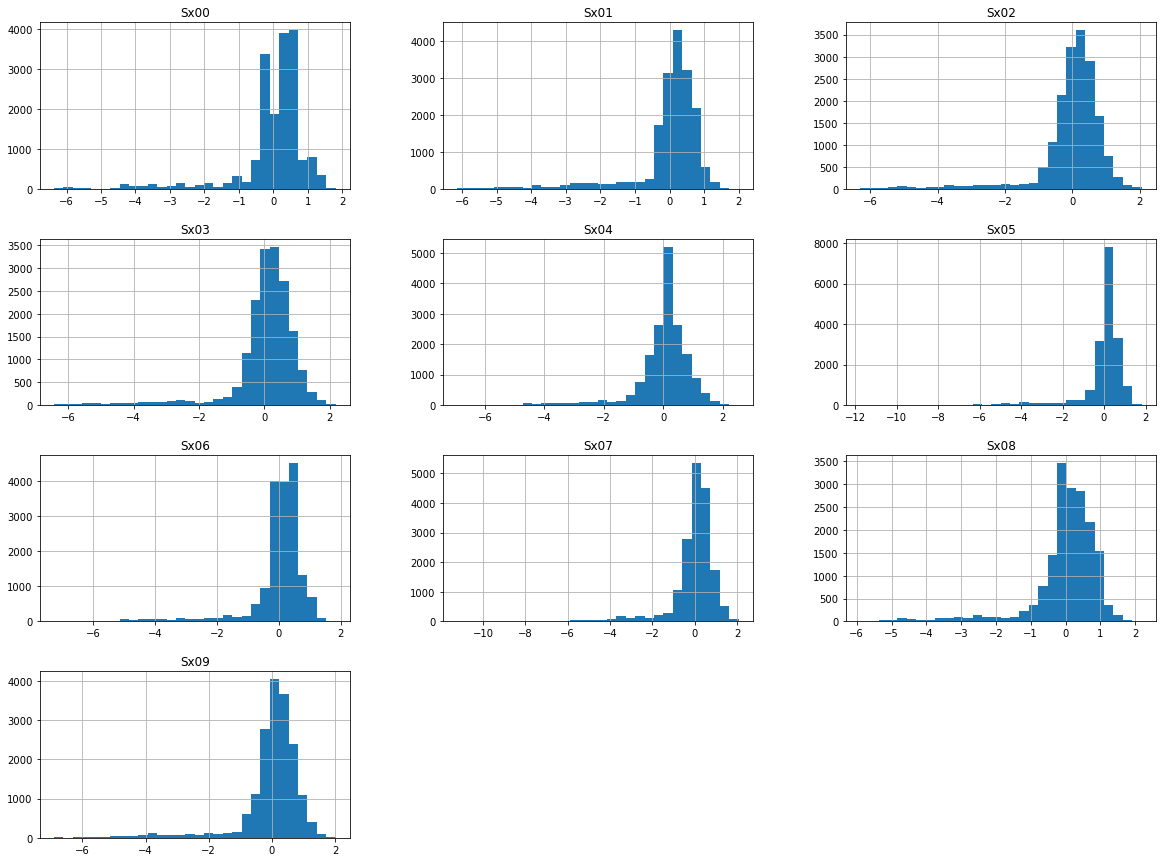

In [229]:
SD = SensorData
nSD = (SD - SD.mean())/SD.std()
nSD = nSD.iloc[:,:10]
oSD = SD.iloc[:,10:13]
nSD.hist(bins=30, figsize=(20,15))
nSD = nSD.join(oSD)

<ipython-input-189-cbbc8e298e33>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(polar=True)


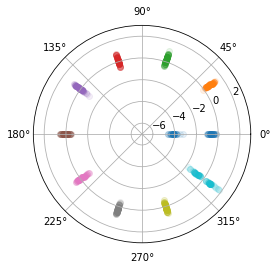

In [189]:
rData =  nSD['r'] == ext[0]
thetaData =  nSD['theta'] == ext[1]
SDext = nSD[ rData  & thetaData]
for i in range(0,10):
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    spider_theta = SDext["r"]/ext[0]*i*36*toRad
    spider_r = SDext[Sxarray[i]]
    ax = plt.subplot(polar=True)
    c = ax.scatter(spider_theta, spider_r, alpha=0.1)
    ax.set_rmin(-7)
    ax.set_rmax(3)

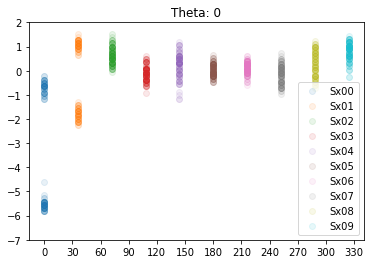

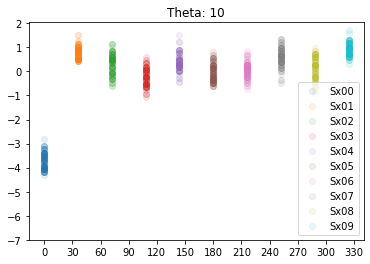

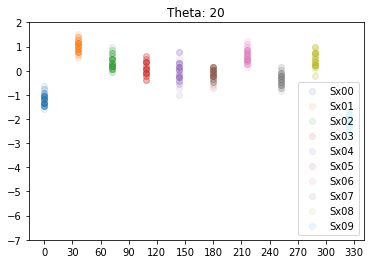

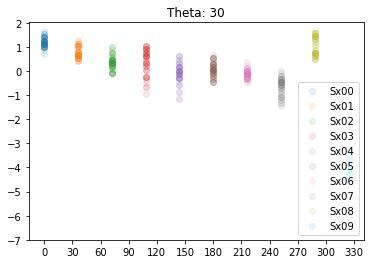

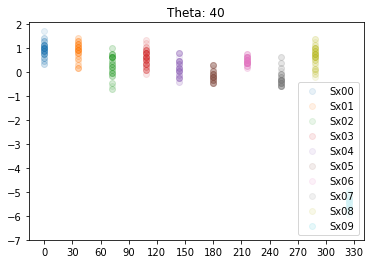

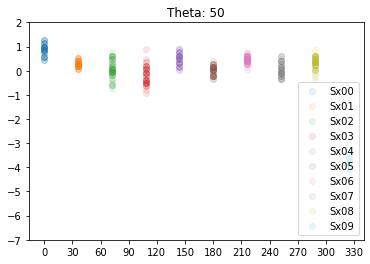

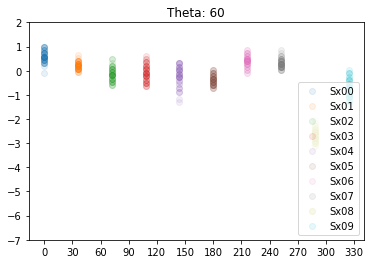

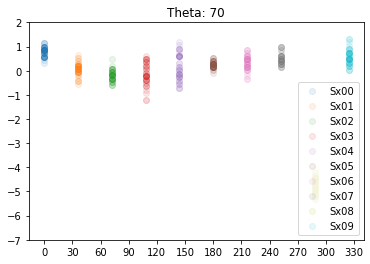

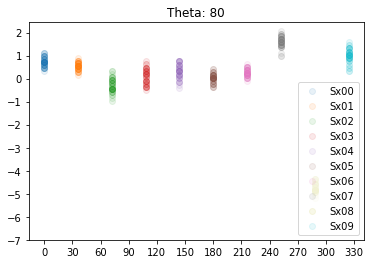

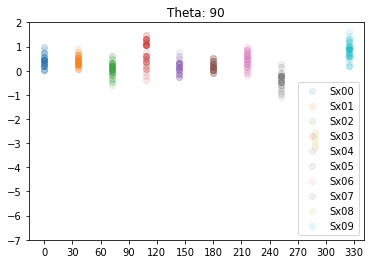

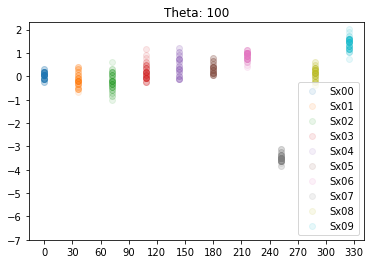

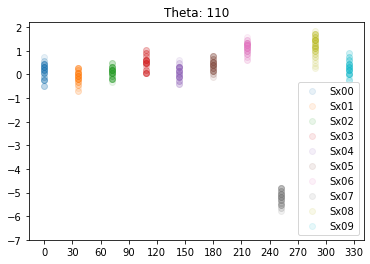

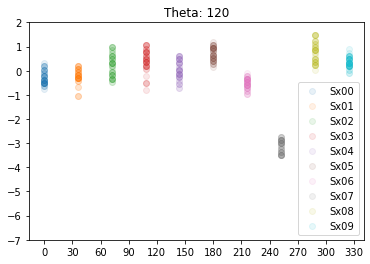

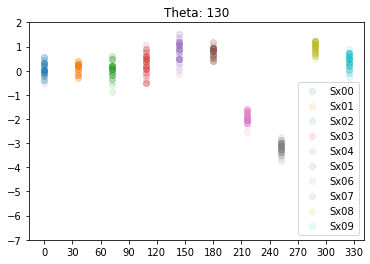

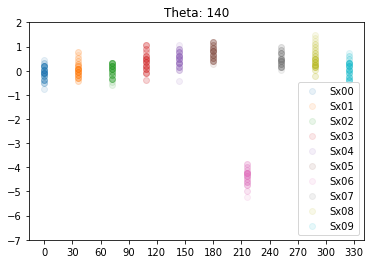

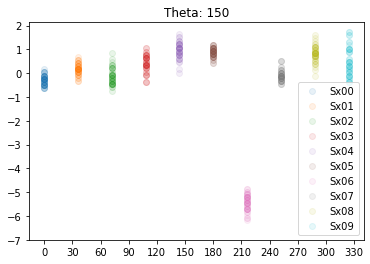

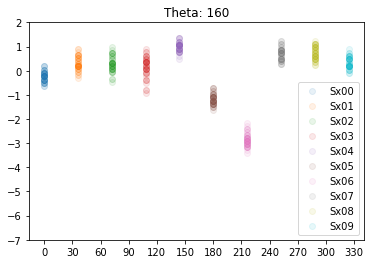

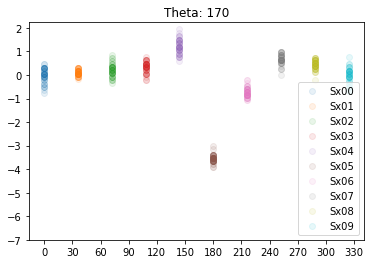

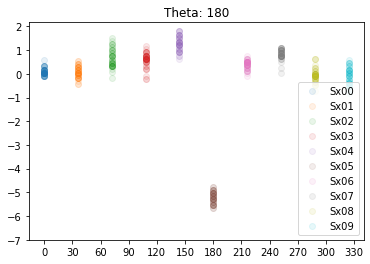

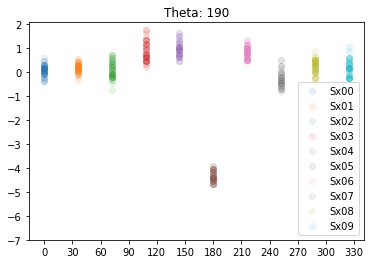

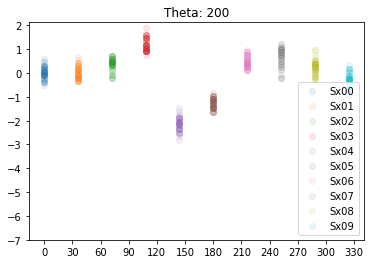

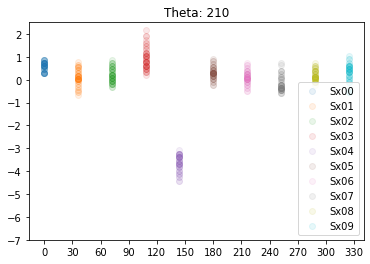

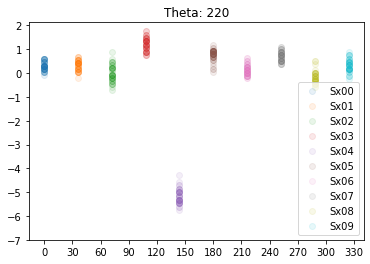

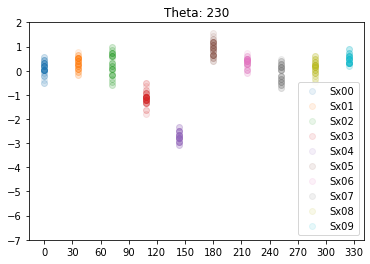

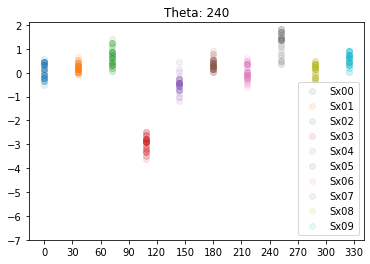

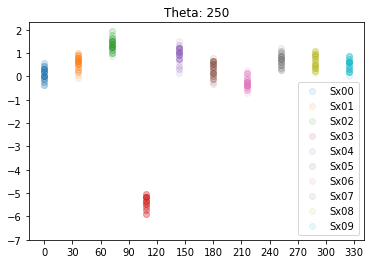

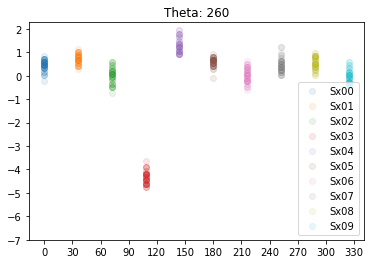

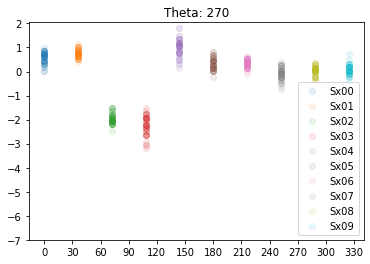

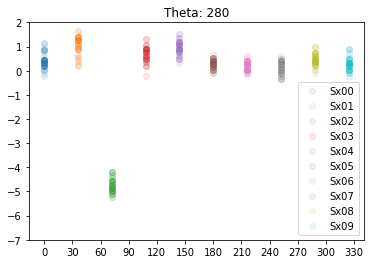

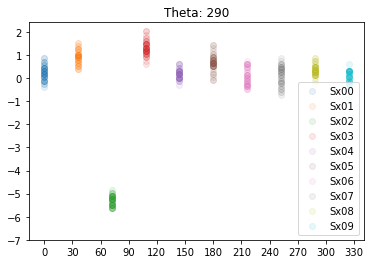

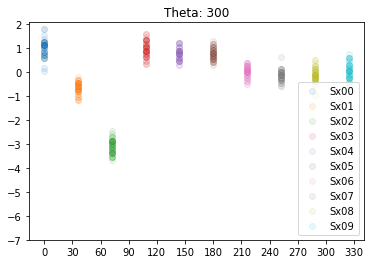

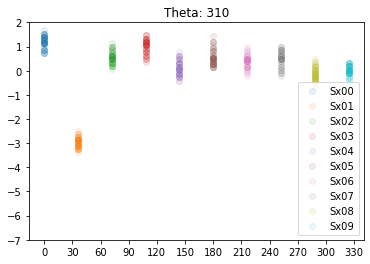

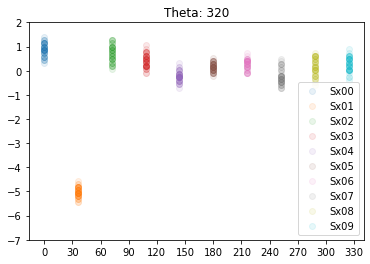

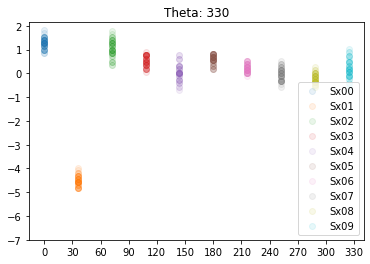

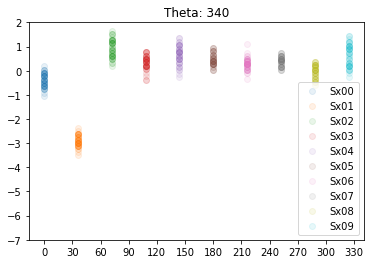

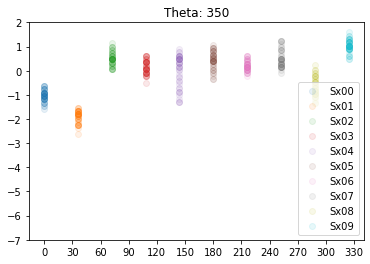

In [248]:
for j in range(0,36):
    ext = [1.6 ,j*10]
    rData =  nSD['r'] == ext[0];  thetaData =  nSD['theta'] == ext[1]
    SDext = nSD[ rData  & thetaData]    
    for i in range(0,10):
        plt.scatter(x= SDext["r"]/ext[0]*i*36,y= SDext['Sx0%X' %i],alpha = 0.1,label="Sx0%X" %i)
        plt.xticks(range(0,360,30))
        plt.yticks(range(-7,3,1))        
        
        plt.title('Theta: {0}'.format(10*j))
        plt.legend(loc='lower right')
    plt.show()

In [ ]:
nSD.describe()

In [242]:
for i in range(0,11):
    print('Sx0%X' %i)

Sx00
Sx01
Sx02
Sx03
Sx04
Sx05
Sx06
Sx07
Sx08
Sx09
Sx0A


In [10]:
#math
import numpy as np
toRad = np.pi/180 
SensorData['cos']=np.cos(SensorData.theta_enc*toRad)
SensorData['sin']=np.sin(SensorData.theta_enc*toRad)

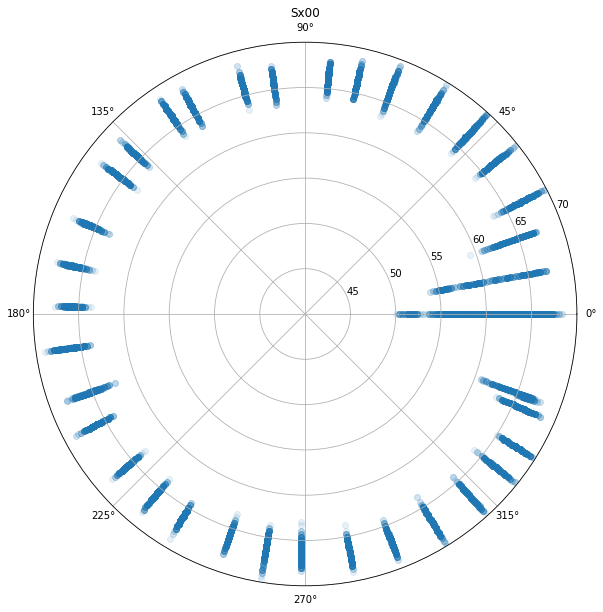

In [11]:
for i in range(0,1):
    plt.figure(figsize = (10,10))
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    Sxrange=[[50,70],[45,75],[40,65],[45,65],[45,70],[75,100],[60,85],[75,105],[50,75],[45,70]]
    spider_theta = SensorData["theta_enc"]*toRad
    spider_r = SensorData[Sxarray[i]]
    ax = plt.subplot(polar=True)
    c = ax.scatter(spider_theta, spider_r, alpha=0.1)
    ax.set_rmin(Sxrange[i][0]-10)
    ax.set_rmax(Sxrange[i][1])    
    plt.title(Sxarray[i])
    #plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v1/savefig/210805_70ms_Mean3ea_hist_spider_{0}.png'.format(Sxarray[i]))
    plt.show()